# Deri Kanseri Sınıflandırma

In [1]:
import cv2
import pandas as pd
import os

In [2]:
#pip install opencv-python

In [3]:
labels=['Cancer', 'Non_Cancer']
img_path='/kaggle/input/skin-data/Skin_Data/'

In [4]:
img_list=[]
label_list =[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+ img_file)
        label_list.append(label)

In [5]:
#os.listdir('/kaggle/input/skin-data/Skin_Data')

In [6]:
df=pd.DataFrame({'img':img_list, 'label':label_list})

In [7]:
df.tail()

,img,label
283,/kaggle/input/skin-data/Skin_Data/Non_Cancer/1...,Non_Cancer
284,/kaggle/input/skin-data/Skin_Data/Non_Cancer/1...,Non_Cancer
285,/kaggle/input/skin-data/Skin_Data/Non_Cancer/1...,Non_Cancer
286,/kaggle/input/skin-data/Skin_Data/Non_Cancer/3...,Non_Cancer
287,/kaggle/input/skin-data/Skin_Data/Non_Cancer/1...,Non_Cancer


In [8]:
import matplotlib.pyplot as plt

In [9]:
d={'Cancer':1, 'Non_Cancer':0} # Daha fazla tane varsa label encoder yap. label_encoder.fit_transform(df['label'])

In [10]:
df['encode_label']=df['label'].map(d) # yukarıdaki d sözlüğünü baz alarak label'ları encode ediyoruz.

In [11]:
import numpy as np # pill veya matplotlib ile de okulabilir

In [12]:
x=[]
for img in df['img']:
    img=cv2.imread(img)
    img=cv2.resize(img,(170,170)) # boyut düzenleme
    img=img/255 # normalize
    x.append(img)

In [13]:
x=np.array(x)

In [14]:
y=df['encode_label']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Input, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization

## CNN Convolutional Neural Networks

In [18]:
model=Sequential()
model.add(Input(shape=(170,170,3)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))

model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 168, 168, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 84, 84, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 82, 82, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 41, 41, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 107584)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    13,770,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,790,530 (52.61 MB)

 Trainable params: 13,790,530 (52.61 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history=model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=15, verbose=1)

Epoch 1/15


I0000 00:00:1725718199.231214     103 service.cc:145] XLA service 0x7a91600042b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725718199.231262     103 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725718199.231266     103 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6295 - loss: 14.9764

I0000 00:00:1725718202.987513     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.6111 - loss: 15.3198

I0000 00:00:1725718204.595304     106 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion', 8 bytes spill stores, 8 bytes spill loads



8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 398ms/step - accuracy: 0.5968 - loss: 15.5868 - val_accuracy: 0.7586 - val_loss: 0.5399
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7234 - loss: 0.7420 - val_accuracy: 0.6552 - val_loss: 0.6891
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7770 - loss: 0.6488 - val_accuracy: 0.6897 - val_loss: 0.6438
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8213 - loss: 0.5033 - val_accuracy: 0.8103 - val_loss: 0.4825
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8040 - loss: 0.4675 - val_accuracy: 0.8103 - val_loss: 0.4880
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8063 - loss: 0.4275 - val_accuracy: 0.7759 - val_loss: 0.4998
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8306 - loss: 0.3967 - val_accuracy: 0.7414 - val_loss: 0.5214
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8881 - loss: 0.3357 - val_accuracy: 0.7586 - val_loss: 0.5812
Epoch 9/1

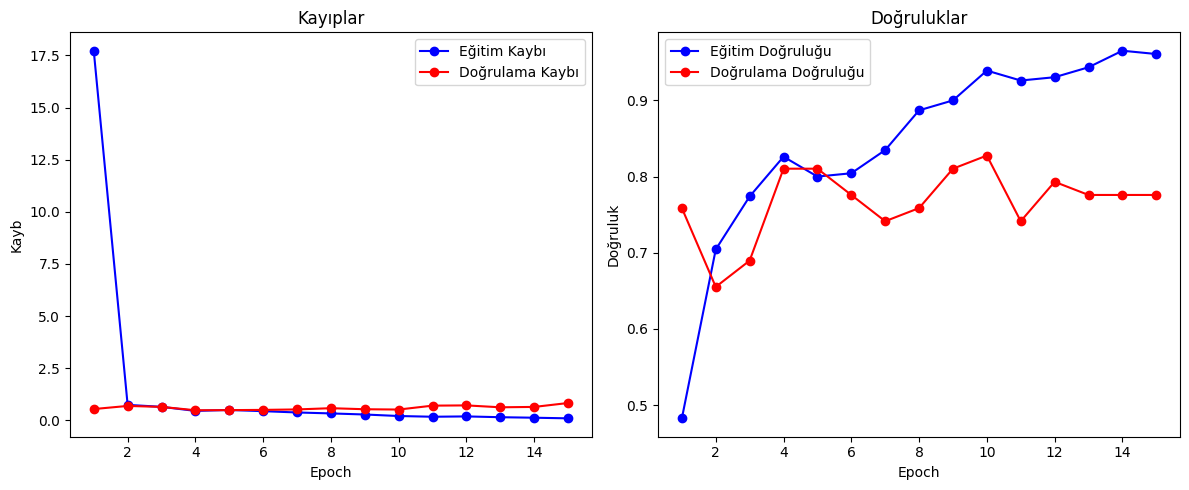

In [20]:
import matplotlib.pyplot as plt  

# Eğitim geçmişini al  
loss = history.history['loss']  
val_loss = history.history['val_loss']  
accuracy = history.history['accuracy']  
val_accuracy = history.history['val_accuracy']  

# Epoch sayısını belirle  
epochs = range(1, len(loss) + 1)  

# Kayıpları çiz  
plt.figure(figsize=(12, 5))  

plt.subplot(1, 2, 1)  
plt.plot(epochs, loss, 'bo-', label='Eğitim Kaybı')  
plt.plot(epochs, val_loss, 'ro-', label='Doğrulama Kaybı')  
plt.title('Kayıplar')  
plt.xlabel('Epoch')  
plt.ylabel('Kayb')  
plt.legend()  

# Doğrulukları çiz  
plt.subplot(1, 2, 2)  
plt.plot(epochs, accuracy, 'bo-', label='Eğitim Doğruluğu')  
plt.plot(epochs, val_accuracy, 'ro-', label='Doğrulama Doğruluğu')  
plt.title('Doğruluklar')  
plt.xlabel('Epoch')  
plt.ylabel('Doğruluk')  
plt.legend()  

plt.tight_layout()  
plt.show()

In [21]:
import numpy as np  

# Eğitim geçmişini al  
loss = history.history['loss']  
val_loss = history.history['val_loss']  
accuracy = history.history['accuracy']  
val_accuracy = history.history['val_accuracy']  

# Son epoch değerlerini al  
final_train_loss = loss[-1]  
final_val_loss = val_loss[-1]  
final_train_accuracy = accuracy[-1]  
final_val_accuracy = val_accuracy[-1]  

# Overfitting ve Underfitting kontrolü  
if final_train_loss < final_val_loss:  
    print("Model Underfitting: Eğitim kaybı doğrulama kaybından daha düşük.")  
elif final_train_loss > final_val_loss:  
    print("Model Overfitting: Eğitim kaybı doğrulama kaybından daha yüksek.")  
else:  
    print("Model dengede: Eğitim ve doğrulama kayıpları eşit.")  

# Doğruluk kontrolü  
if final_train_accuracy < final_val_accuracy:  
    print("Model Underfitting: Eğitim doğruluğu doğrulama doğruluğundan daha düşük.")  
elif final_train_accuracy > final_val_accuracy:  
    print("Model Overfitting: Eğitim doğruluğu doğrulama doğruluğundan daha yüksek.")  
else:  
    print("Model dengede: Eğitim ve doğrulama doğrulukları eşit.")

Model Underfitting: Eğitim kaybı doğrulama kaybından daha düşük.
Model Overfitting: Eğitim doğruluğu doğrulama doğruluğundan daha yüksek.


In [22]:
model.save('skin_cancer_model.h5')

In [2]:
# VGGNET, ResNet50, Inception, Xception, MobileNetV2
#history of image processing and object detection

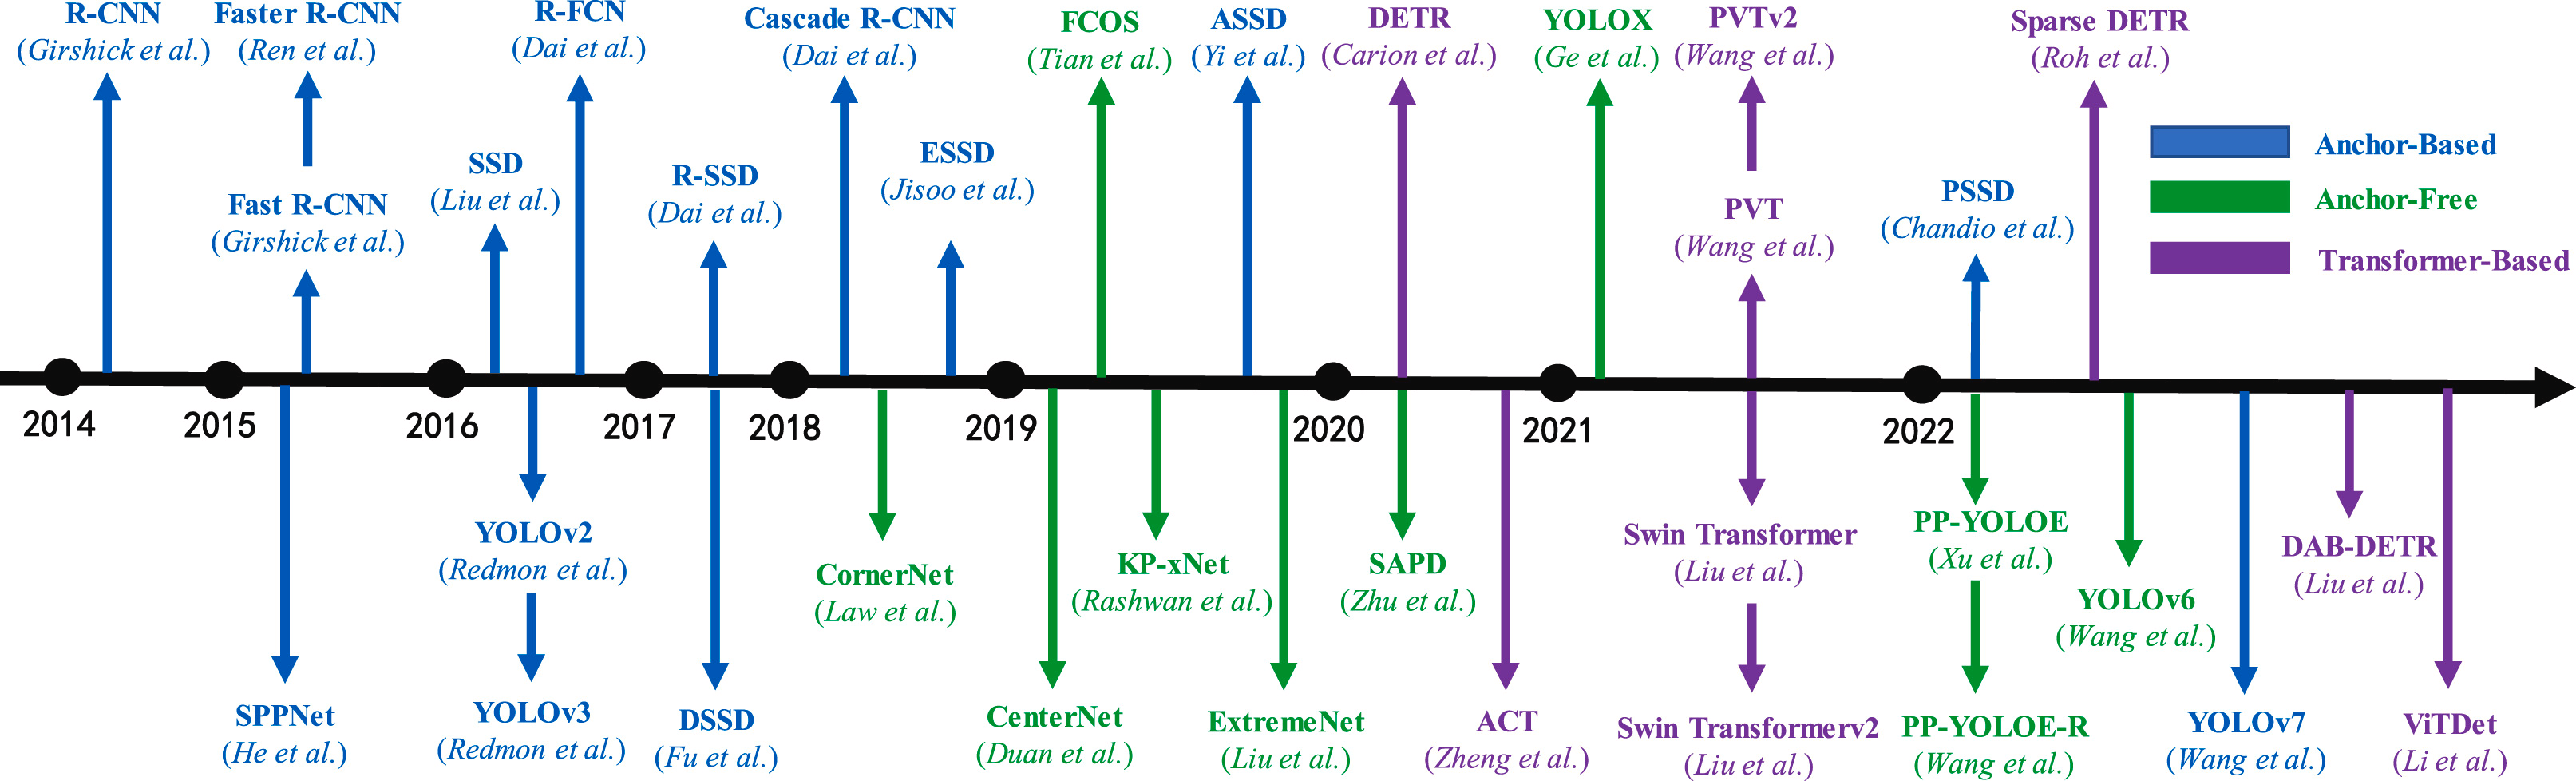

# Transfer Learning


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data_dir='Skin_Data'
img_width,img_height=224,224

idg = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data_gen=idg.flow_from_directory(directory=data_dir,
                                  target_size=(img_width, img_height),
                                  class_mode='binary',
                                  subset='training')

test_data_gen=idg.flow_from_directory(directory=data_dir,
                                  target_size=(img_width, img_height),
                                  class_mode='binary',
                                  subset='validation')



Found 232 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


In [3]:
base_model=ResNet50(weights='imagenet', input_shape=(img_width, img_height,3), include_top=False)

model=Sequential()
model.add(base_model) # transfer ettik
for layer in base_model.layers: # freeze ettik
    layer.trainable=False # Layerleri eğitmiyoruz, donduruyoruz

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │   102,761,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,350,209 (481.99 MB)

 Trainable params: 102,762,497 (392.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [4]:
history2=model.fit(train_data_gen, validation_data=test_data_gen, epochs=15, verbose=1)

Epoch 1/15


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 97s 10s/step - accuracy: 0.4497 - loss: 17.1327 - val_accuracy: 0.2857 - val_loss: 7.0466
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 79s 11s/step - accuracy: 0.3916 - loss: 3.5608 - val_accuracy: 0.7143 - val_loss: 0.7626
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 80s 11s/step - accuracy: 0.7502 - loss: 0.6607 - val_accuracy: 0.7143 - val_loss: 0.6452
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 89s 11s/step - accuracy: 0.6924 - loss: 0.6557 - val_accuracy: 0.7143 - val_loss: 0.6107
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 82s 11s/step - accuracy: 0.6888 - loss: 0.6271 - val_accuracy: 0.7143 - val_loss: 0.6134
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 82s 11s/step - accuracy: 0.6831 - loss: 0.6248 - val_accuracy: 0.7143 - val_loss: 0.5986
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 84s 11s/step - accuracy: 0.7311 - loss: 0.5856 - val_accuracy: 0.7143 - val_loss: 0.5985
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 74s 9s/step - accuracy: 0.6999 - loss: 0.6125 - val_accuracy: 0.7143 - val_loss: 0.5956
Epoch 9/15


In [ ]:
base_model=VGG16(weights='imagenet', input_shape=(img_width, img_height,3), include_top=False)

model=Sequential()
model.add(base_model) # transfer ettik
for layer in base_model.layers: # freeze ettik
    layer.trainable=False # Layerleri eğitmiyoruz, donduruyoruz

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history3=model.fit(train_data_gen, validation_data=test_data_gen, epochs=15, verbose=1)

In [ ]:
#tensorflow or PIL kullanılarak resimleri okutma
from tensorflow.keras.preprocessing import image

# PIL kullanarak resimleri okutma
from PIL import Image

# Resimleri okutma
img_path = 'Skin_Data/Cancer/ISIC_0024373.jpg'
img = Image.open(img_path)
img.show()

# TensorFlow kullanarak resimleri okutma
img_path = 'Skin_Data/Cancer/ISIC_0024373.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)

# Resnet50 ile tahmin yapma

In [6]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

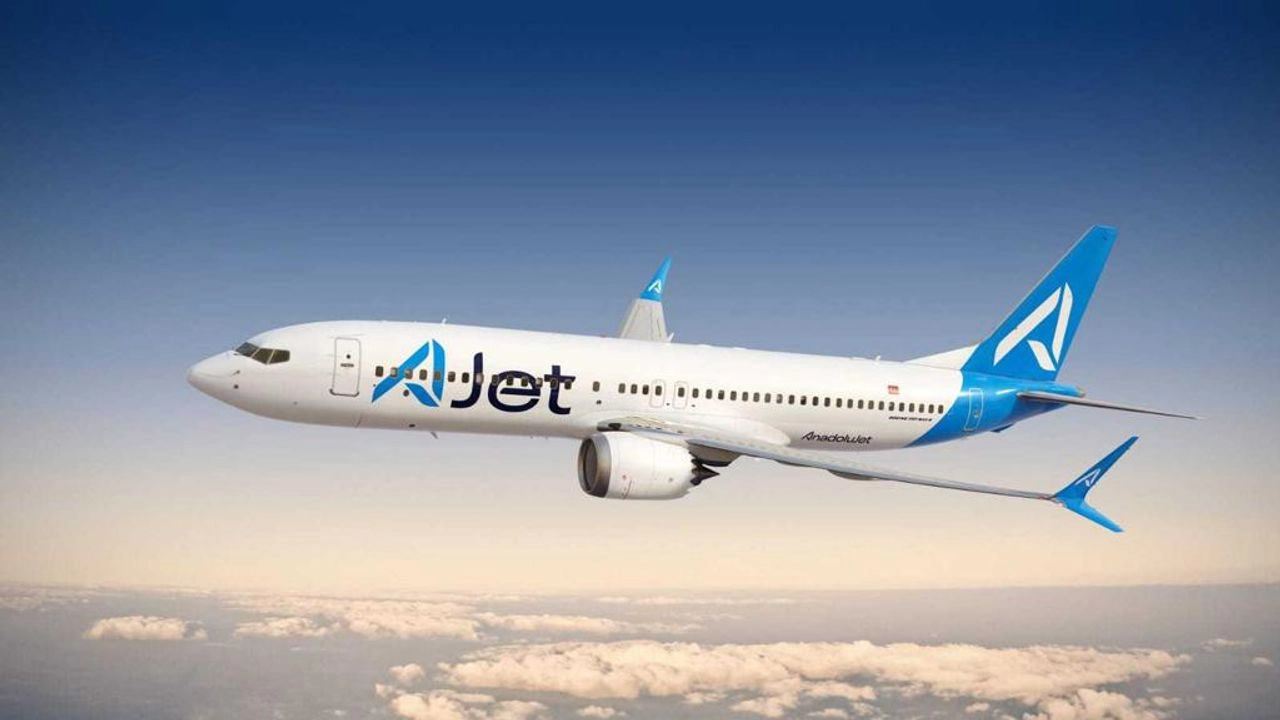

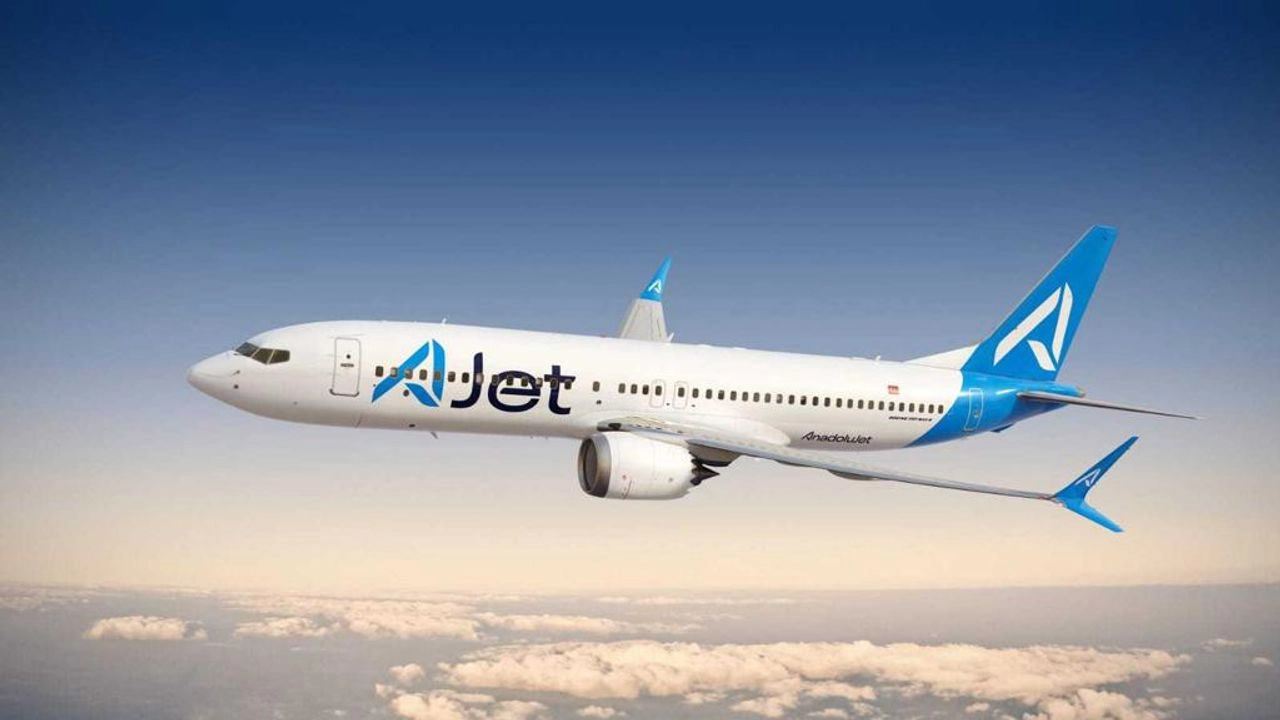

In [14]:
from IPython.display import Image
Image(filename='ajet-lansman-10.jpg')

In [7]:
import numpy as np

img=image.load_img('ajet-lansman-10.jpg', target_size=(224,224))
img=image.img_to_array(img)
img=np.expand_dims(img, axis=0)
img=preprocess_input(img)

In [8]:
model=ResNet50(weights='imagenet')
preds=model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
Predicted: [('n02690373', 'airliner', 0.898791), ('n04592741', 'wing', 0.10072891), ('n04266014', 'space_shuttle', 0.00042880554)]


In [13]:
decode_predictions(preds, top=1)

[[('n02690373', 'airliner', 0.898791)]]